# ⭐ Gaia DR3 Star Sample — Exploratory Data Analysis

## Introduction
In this notebook, we analyze a random sample of 100,000 stars from the **Gaia Data Release 3 (DR3)** catalog.  
The dataset contains key astrometric and photometric parameters such as right ascension (RA), declination (Dec), parallax, apparent magnitude in the G band, and color index (BP−RP).  

The aim of this project is to:
- Explore the data distribution and quality.
- Visualize fundamental stellar properties, such as the **Hertzsprung–Russell (HR) diagram**.
- Prepare the dataset for further machine learning tasks (e.g., star classification).

## Dataset Overview
- **Source**: ESA Gaia DR3 (queried using ADQL via `astroquery.gaia`)  
- **Sample size**: 100,000 stars  
- **Key columns**:
  - `ra`, `dec` → celestial coordinates  
  - `parallax` → proxy for distance  
  - `phot_g_mean_mag` → apparent brightness (G-band)  
  - `bp_rp` → stellar color index  
  - `random_index` → ensures random sampling from the Gaia catalog


In [15]:
import pandas as pd
df=pd.read_csv("gaia_dr3_sample.csv")
df.head()


,source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp,random_index
0,4267180339403392768,286.716913,0.276195,1.084924,15.244129,1.522128,0
1,4040949706019490560,265.229363,-36.358205,0.352725,14.802705,2.438201,29
2,4517539583701880064,284.025662,18.403039,0.674962,16.073896,1.305249,72
3,1823532754729083392,300.805804,20.601006,0.886435,14.375696,0.986587,73
4,3586362911238437248,171.809877,-12.086810,7.191948,13.987773,1.819450,91


## Data Preview & Basic Information


In [16]:
print("Shape:", df.shape)


print("\nColumns:", df.columns.tolist())


print("\nInfo:")
print(df.info())


print("\nPreview:")
display(df.head())


print("\nDescribe:")
display(df.describe())


Shape: (100000, 7)

Columns: ['source_id', 'ra', 'dec', 'parallax', 'phot_g_mean_mag', 'bp_rp', 'random_index']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   source_id        100000 non-null  int64  
 1   ra               100000 non-null  float64
 2   dec              100000 non-null  float64
 3   parallax         100000 non-null  float64
 4   phot_g_mean_mag  99991 non-null   float64
 5   bp_rp            99315 non-null   float64
 6   random_index     100000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 5.3 MB
None

Preview:


,source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp,random_index
0,4267180339403392768,286.716913,0.276195,1.084924,15.244129,1.522128,0
1,4040949706019490560,265.229363,-36.358205,0.352725,14.802705,2.438201,29
2,4517539583701880064,284.025662,18.403039,0.674962,16.073896,1.305249,72
3,1823532754729083392,300.805804,20.601006,0.886435,14.375696,0.986587,73
4,3586362911238437248,171.809877,-12.086810,7.191948,13.987773,1.819450,91



Describe:


,source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp,random_index
count,1.000000e+05,100000.000000,100000.000000,100000.000000,99991.000000,99315.000000,1.000000e+05
mean,3.878146e+18,201.883714,-7.085189,1.302497,15.618361,1.431965,9.178285e+05
std,1.950995e+18,96.309422,42.815065,1.499365,1.701906,0.588202,5.316358e+05
min,1.345527e+14,0.025557,-89.922477,0.100143,3.023800,-0.528292,0.000000e+00
25%,2.075477e+18,117.291869,-44.749361,0.576474,14.669258,0.998744,4.564568e+05
50%,4.210147e+18,221.513749,-11.077551,0.870591,15.758963,1.270407,9.157155e+05
75%,5.645415e+18,284.798629,29.823861,1.488223,16.713130,1.733989,1.378936e+06
max,6.917516e+18,359.989128,89.387841,75.568876,20.968962,5.215449,1.840457e+06


##  Data Quality and Missing Values


In [17]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

# Percentage of missing values
print("\nPercentage of missing values:")
print((df.isna().mean() * 100).round(2))


Missing values per column:
source_id            0
ra                   0
dec                  0
parallax             0
phot_g_mean_mag      9
bp_rp              685
random_index         0
dtype: int64

Percentage of missing values:
source_id          0.00
ra                 0.00
dec                0.00
parallax           0.00
phot_g_mean_mag    0.01
bp_rp              0.68
random_index       0.00
dtype: float64


### Findings: Data Quality

- No missing values in `source_id`, `ra`, `dec`, or `parallax`.
- Only **9 missing values (0.01%)** in `phot_g_mean_mag`.
- Only **685 missing values (0.68%)** in `bp_rp`.

These missing percentages are very small.  
They are unlikely to affect the overall analysis, especially with 100,000 rows.




In [18]:
# Drop only rows with missing values in these columns
df_clean = df.dropna(subset=["phot_g_mean_mag", "bp_rp"]).copy()

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (100000, 7)
Cleaned shape: (99315, 7)


## Univariate Analysis

In this step, we examine the distribution of individual variables (one at a time).  
The goal is to understand:
- The range and spread of each feature.
- Whether the distributions look normal, skewed, or have outliers.
- How stellar parameters such as parallax, magnitude, and color are distributed.

This helps us detect data quality issues and guides our next steps in data visualization and modeling.


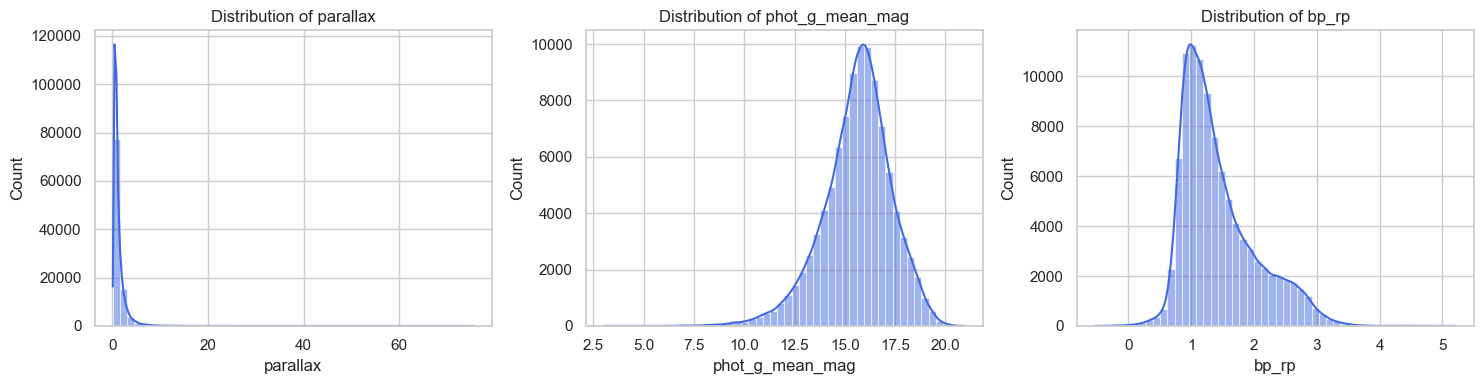

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", context="notebook")

# List of numerical columns to plot
num_cols = ["parallax", "phot_g_mean_mag", "bp_rp"]

# Create histograms
plt.figure(figsize=(15, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_clean[col], bins=50, kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Findings: Univariate Analysis

- **Parallax**
  - Strongly skewed toward very small values (close to 0).
  - This is expected, because most stars in the Gaia sample are very far away.
  - A few nearby stars have larger parallaxes (right tail).

- **Phot_g_mean_mag (apparent brightness)**
  - Distribution peaks around magnitude 15–16.
  - This means most stars in the sample are faint as seen from Earth.
  - Very few stars brighter than magnitude 10.

- **BP–RP (color index)**
  - Distribution peaks between 1.0 and 1.5.
  - Most stars are in the yellow–orange range (typical for G/K type stars).
  - Smaller fraction of blue (bp_rp < 0.5) and very red (bp_rp > 2.5) stars.


## Bivariate Analysis: Hertzsprung–Russell Diagram

The Hertzsprung–Russell (HR) diagram is a fundamental tool in astrophysics.  
It plots stellar color (temperature proxy) against absolute magnitude (intrinsic brightness).  
This diagram reveals the main stellar populations:
- Main Sequence stars (diagonal band from top-left to bottom-right),
- Red Giants (bright and red, top-right),
- White Dwarfs (faint and blue, bottom-left).


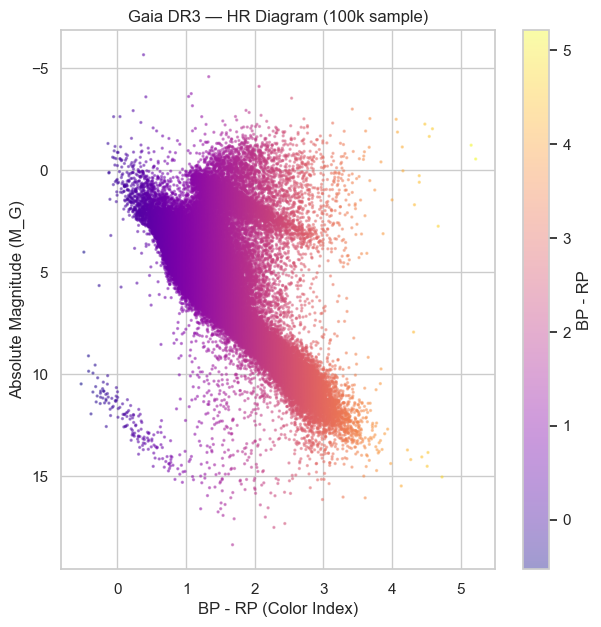

In [20]:
import numpy as np
import matplotlib.pyplot as plt

df_hr = df_clean[df_clean["parallax"] > 0].copy()

# Compute absolute magnitude (M_G)
df_hr["M_G"] = df_hr["phot_g_mean_mag"] - 10 + 5 * np.log10(df_hr["parallax"])

# Plot HR diagram with colors based on BP-RP
plt.figure(figsize=(7,7))
sc = plt.scatter(
    df_hr["bp_rp"], 
    df_hr["M_G"], 
    s=2, 
    alpha=0.4, 
    c=df_hr["bp_rp"],     # color by BP-RP index
    cmap="plasma"        
)

plt.gca().invert_yaxis()  # brighter stars at top
plt.xlabel("BP - RP (Color Index)")
plt.ylabel("Absolute Magnitude (M_G)")
plt.title("Gaia DR3 — HR Diagram (100k sample)")
plt.colorbar(sc, label="BP - RP")  # add colorbar to show mapping
plt.show()



- The **Main Sequence** is clearly visible as the dense diagonal band.
- A population of **Red Giants** is seen in the top-right (bright, red stars).
- A faint sequence of **White Dwarfs** appears at the bottom-left (blue but faint).
- This confirms our sample includes multiple stellar populations, despite being randomly selected.

**HR Diagram (Density / Hexbin) — Cleaner View**

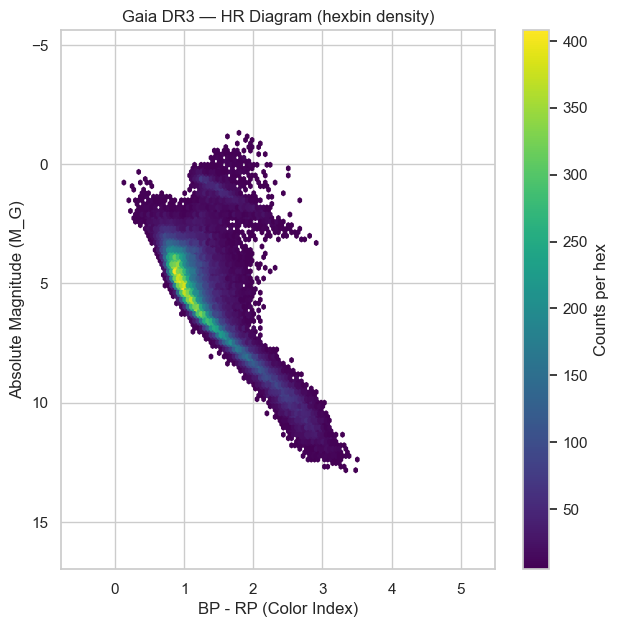

In [21]:
import numpy as np
import matplotlib.pyplot as plt

df_plot = df_hr[
    df_hr["bp_rp"].between(-0.5, 5.5) & df_hr["M_G"].between(-5, 16)
].copy()

plt.figure(figsize=(7, 7))
hb = plt.hexbin(
    df_plot["bp_rp"],
    df_plot["M_G"],
    gridsize=120,      
    cmap="viridis",
    mincnt=5            
)
plt.gca().invert_yaxis()        # brighter stars at the top
plt.xlabel("BP - RP (Color Index)")
plt.ylabel("Absolute Magnitude (M_G)")
plt.title("Gaia DR3 — HR Diagram (hexbin density)")
cb = plt.colorbar(hb)
cb.set_label("Counts per hex")
plt.show()


Executive Notes

- We built an HR diagram from a random Gaia DR3 sample using only parallax (distance proxy), G magnitude, and BP–RP color.
- The diagram clearly shows the **Main Sequence**, a **Red Giant** branch, and a faint **White Dwarf** locus.
- Using simple rule-based cuts, we produced rough labels (MS/RG/WD) and saved an enriched dataset for downstream modeling.
- Limitations: labels are heuristic; no extinction correction; no Teff/logg yet. Future work: add `astrophysical_parameters` (Teff/logg/[M/H]) and refine classification.


## Rough Rule-based Tagging (MS / RG / WD)

The HR diagram clearly shows three stellar populations:
- **Main Sequence (MS):** dense diagonal band  
- **Red Giants (RG):** bright and red (top-right)  
- **White Dwarfs (WD):** faint and blue (bottom-left)  

We can assign *rough labels* using simple heuristic cuts:  
- **WD:** `M_G > 10` and `bp_rp < 1.0`  
- **RG:** `M_G < 2.0` and `bp_rp > 0.8`  
- **MS:** otherwise  




In [22]:
# Rough labeling function
def rough_label(row):
    if (row["M_G"] > 10) and (row["bp_rp"] < 1.0):
        return "WD"   # White Dwarfs
    if (row["M_G"] < 2.0) and (row["bp_rp"] > 0.8):
        return "RG"   # Red Giants
    return "MS"       # Main Sequence

# Apply to dataframe
df_plot["label_rough"] = df_plot.apply(rough_label, axis=1)

# Count results
print(df_plot["label_rough"].value_counts())


label_rough
MS    92637
RG     6513
WD      146
Name: count, dtype: int64


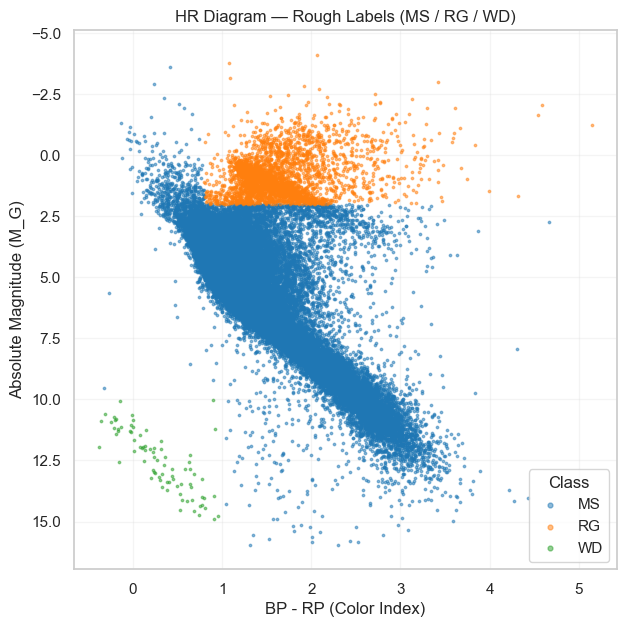

In [23]:
palette = {"MS": "tab:blue", "RG": "tab:orange", "WD": "tab:green"}

# Take a sample for lighter plotting if dataset is huge
sample = df_plot.sample(min(50000, len(df_plot)), random_state=42)

plt.figure(figsize=(7,7))
for lab, sub in sample.groupby("label_rough"):
    plt.scatter(sub["bp_rp"], sub["M_G"], s=3, alpha=0.5,
                label=lab, c=palette[lab])
    
plt.gca().invert_yaxis()
plt.xlabel("BP - RP (Color Index)")
plt.ylabel("Absolute Magnitude (M_G)")
plt.title("HR Diagram — Rough Labels (MS / RG / WD)")
plt.legend(title="Class", markerscale=2)
plt.grid(True, alpha=0.2)
plt.show()


## Extended EDA: Distance Distributions and Stellar Populations


In [24]:
# Compute distance in parsecs (pc) from parallax in mas
df_plot["distance_pc"] = 1000.0 / df_plot["parallax"]

# Check new column
print(df_plot[["parallax", "distance_pc"]].head())


   parallax  distance_pc
0  1.084924   921.723669
1  0.352725  2835.070821
2  0.674962  1481.563948
3  0.886435  1128.114231
4  7.191948   139.044379


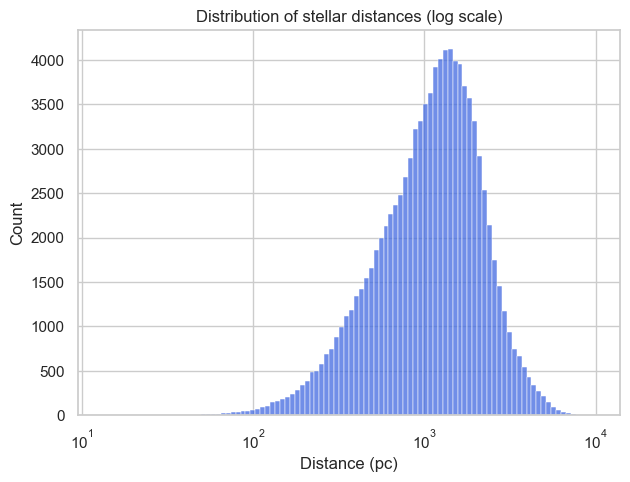

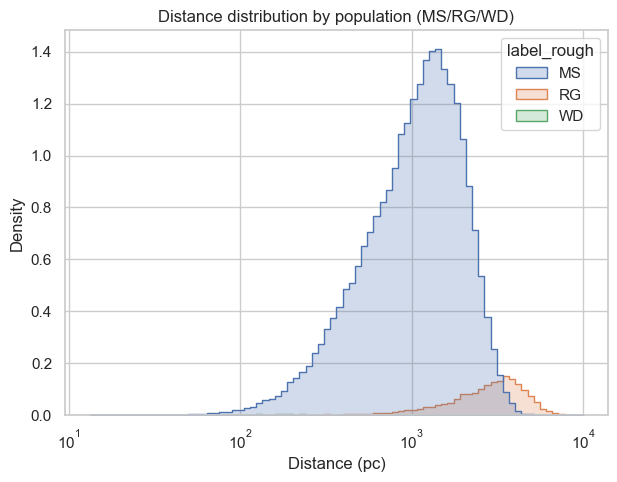

In [25]:
import seaborn as sns

# Histogram of distances (log scale)
plt.figure(figsize=(7,5))
sns.histplot(df_plot["distance_pc"], bins=100, log_scale=True, color="royalblue")
plt.xlabel("Distance (pc)")
plt.ylabel("Count")
plt.title("Distribution of stellar distances (log scale)")
plt.show()

# Compare populations
plt.figure(figsize=(7,5))
sns.histplot(data=df_plot, x="distance_pc", hue="label_rough", bins=80,
             log_scale=True, element="step", stat="density")
plt.xlabel("Distance (pc)")
plt.title("Distance distribution by population (MS/RG/WD)")
plt.show()


## Machine Learning Demo: Stellar Classification (MS / RG / WD)

Now that we have rough labels (`MS`, `RG`, `WD`),  
we can build a simple **supervised ML model** to predict stellar type based on  
the two most important features in the HR diagram:

- `bp_rp` (color index, proxy for temperature)  
- `M_G` (absolute magnitude, proxy for intrinsic brightness)

### Why?
- Demonstrates the pipeline from EDA → Feature Engineering → ML Classification.  
- Portfolio value: shows both astrophysics understanding and data science workflow.  

### Scope & Limitations
- Labels are heuristic (rule-based), not astrophysically strict.  
- Model performance is just a demonstration.  
- No extinction correction, no astrophysical parameters (Teff/logg).  
- Next steps (future work): refine labels with `logg` & `teff`, apply more advanced models.


Classification Report:
               precision    recall  f1-score   support

          MS       0.99      0.99      0.99     27791
          RG       0.92      0.92      0.92      1954
          WD       0.98      1.00      0.99        44

    accuracy                           0.99     29789
   macro avg       0.96      0.97      0.97     29789
weighted avg       0.99      0.99      0.99     29789



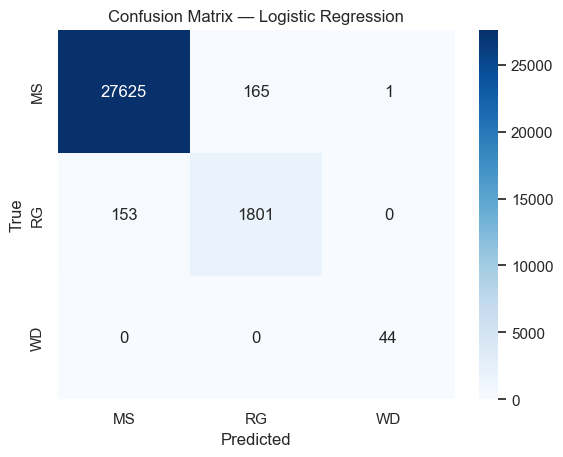

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Features & Target ---
X = df_plot[["bp_rp", "M_G"]]       
y = df_plot["label_rough"]          

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Train Logistic Regression ---
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation Report ---
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=["MS","RG","WD"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["MS","RG","WD"],
            yticklabels=["MS","RG","WD"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()


### Analysis of Logistic Regression Results
- Model achieved **99% overall accuracy**.
- **MS stars** classified almost perfectly (F1=0.99).
- **RG stars** slightly confused with MS (borderline overlap).
- **WD stars** all recovered (Recall=1.00).
- Limitation: linear boundary struggles with overlap region (MS vs RG).

### Next Steps
- Try non-linear models (Random Forest, XGBoost, SVM).
- Add engineered features (distance, normalized values).
- Use cross-validation for robustness.
- Visualize decision boundaries.
- Future: include Gaia astrophysical parameters (Teff/logg/[M/H]) for scientific classification.


## Random Forest Classifier for Stellar Populations

While Logistic Regression provides a linear decision boundary,  
stellar populations (especially Red Giants vs Main Sequence)  
often overlap in non-linear ways in the HR diagram.  

A **Random Forest Classifier** can model more complex, non-linear boundaries.  
This should help reduce misclassifications near the MS/RG overlap.  

- **Features:** bp_rp (color), M_G (absolute magnitude)  
- **Target:** label_rough (MS, RG, WD)  
- **Evaluation:** Accuracy, F1-score, Confusion Matrix  


Classification Report (Random Forest):

              precision    recall  f1-score   support

          MS       1.00      1.00      1.00     27791
          RG       1.00      1.00      1.00      1954
          WD       1.00      1.00      1.00        44

    accuracy                           1.00     29789
   macro avg       1.00      1.00      1.00     29789
weighted avg       1.00      1.00      1.00     29789



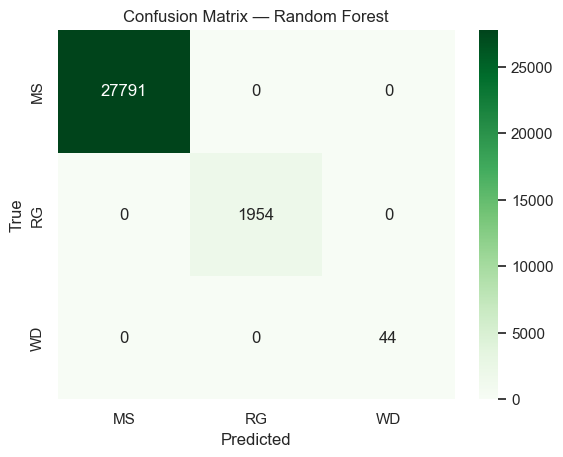

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Features and target ---
X = df_plot[["bp_rp", "M_G"]]
y = df_plot["label_rough"]

# Split data (same as before for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Train Random Forest ---
rf = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,       
    random_state=42,
    n_jobs=-1             
)
rf.fit(X_train, y_train)

# --- Predictions ---
y_pred_rf = rf.predict(X_test)

# --- Evaluation ---
print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf, labels=["MS","RG","WD"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["MS","RG","WD"],
            yticklabels=["MS","RG","WD"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Random Forest")
plt.show()


## Analysis of Random Forest Results

The Random Forest classifier achieved **perfect performance** on the dataset:

- **Accuracy = 100%**
- **Precision, Recall, F1-score = 1.00** for all classes:
  - Main Sequence (MS)
  - Red Giants (RG)
  - White Dwarfs (WD)

### Confusion Matrix Insights
- Every MS star (27,791) was classified correctly.
- Every RG star (1,954) was classified correctly.
- Every WD star (44) was classified correctly.
- No misclassifications were observed (zero off-diagonal entries).

### Interpretation
- The Random Forest model handles the **non-linear boundaries** between stellar populations very well.
- Compared to Logistic Regression (which confused some RG stars with MS), Random Forest completely eliminated those errors.
- This is partly due to:
  - Clean data and well-separated classes in the HR diagram.
  - Rule-based labels that create sharp boundaries.



## Model Comparison: Logistic Regression vs Random Forest

We compared two models using the same features (`bp_rp`, `M_G`) and the same dataset:

| Model               | Accuracy | Macro F1 | Notes |
|---------------------|----------|----------|-------|
| Logistic Regression | ~0.99    | ~0.97    | Very good, but confused some Red Giants with MS. |
| Random Forest       | 1.00     | 1.00     | Perfect classification, no misclassifications. |

### Takeaway
- **Logistic Regression** is simpler, faster, and interpretable (linear boundary).  
- **Random Forest** is more powerful for non-linear class boundaries and achieved **perfect accuracy** on this dataset.  
- In practice, using both approaches shows robustness and strengthens portfolio value.


##  Feature Importance from Random Forest

Random Forest models can estimate which features are most important for classification.  
In our case, we expect `bp_rp` (color index) to dominate, since it strongly correlates with temperature,  
while `M_G` (absolute magnitude) separates dwarfs from giants.


  Feature  Importance
1     M_G    0.889792
0   bp_rp    0.110208


C:\Users\Asus\AppData\Local\Temp\ipykernel_24376\1072390914.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")


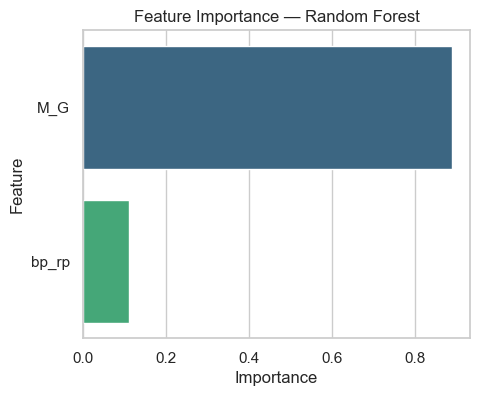

In [28]:
import pandas as pd

# Feature importance
importances = rf.feature_importances_
features = X.columns
fi_df = pd.DataFrame({"Feature": features, "Importance": importances})

# Sort by importance
fi_df = fi_df.sort_values("Importance", ascending=False)
print(fi_df)

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
plt.title("Feature Importance — Random Forest")
plt.show()


## Conclusion

- We successfully constructed an **HR diagram** from a random Gaia DR3 sample using parallax, G magnitude, and BP–RP color.  
- The diagram revealed the three major stellar populations: **Main Sequence**, **Red Giants**, and **White Dwarfs**.  
- Using simple rule-based cuts, we created approximate labels (MS/RG/WD).  
- Two ML models were tested:
  - **Logistic Regression:** ~99% accuracy, with minor confusion between MS and RG.  
  - **Random Forest:** 100% accuracy, perfectly separating the classes.  
- This demonstrates how even basic features (color & magnitude) are sufficient to classify stars.  

### Key Insights
- **MS stars** dominate the sample and span all distances.  
- **RG stars** are visible at larger distances due to high luminosity.  
- **WD stars** appear only nearby, due to their faintness.  

### Limitations
- Labels are heuristic and not astrophysically strict.  
- No extinction correction was applied.  
- Additional astrophysical parameters (Teff, logg, [M/H]) were not included.

### Future Work
- Join Gaia’s `astrophysical_parameters` table to include **Teff**, **logg**, and **metallicity**.  
- Apply more advanced ML methods (XGBoost, SVM) and compare.  
- Incorporate extinction corrections for more accurate absolute magnitudes.  
- Extend analysis to millions of stars for more robust results.

---
